In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

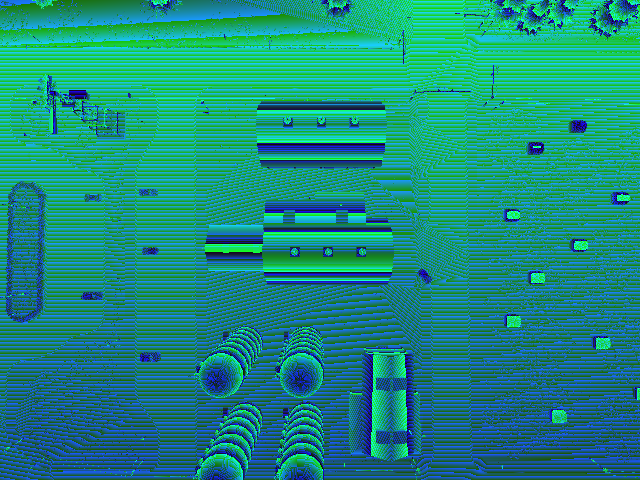

In [2]:
# the images from the dataset where saved as the raw output from
# a CARLA's depth sensor, but as BGR instead of BGRA
carla_depth = Image.open("camera_depth.png")
carla_depth

In [3]:
# The conversion comes from what they used in carla_ros_bridge
# https://github.com/ricardodeazambuja/carla-ros/blob/b0b9a5ec1bb4e98ad3dfbbcd05c180d370af6348/carla_ros_bridge/src/carla_ros_bridge/camera.py#L299

MAX_DEPTH_DIST = 1000 # you can change this to simulate a sensor with a shorter range
bgra_image = np.asarray(carla_depth)

# The standard depth sensor in CARLA is set to a max depth of 1000m
scales = np.array([65536.0, 256.0, 1.0]) / (256**3 - 1) * 1000

# Full resolution depth numpy array (float)
depth_image = np.dot(bgra_image, scales)

# Clamps the max depth to MAX_DEPTH_DIST
depth_image[depth_image>MAX_DEPTH_DIST] = MAX_DEPTH_DIST

# Converts from float values to uint (0 to 255)
depth_image_255 = (255*depth_image/MAX_DEPTH_DIST).astype('uint8')

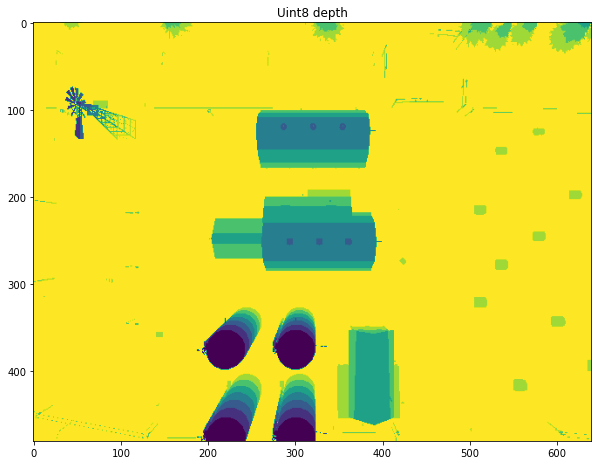

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(depth_image_255)
plt.title("Uint8 depth")
plt.show()

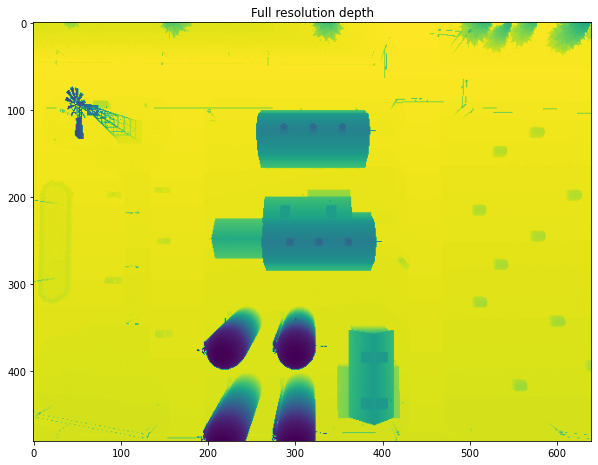

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(depth_image)
plt.title("Full resolution depth")
plt.show()

In [6]:
depth_image.max() # The sensor was at Z=100, but the map may not be totally flat + conversions...

100.95495587318872

In [7]:
depth_image.min()

70.76210205329072